# Exercise Chapter 5_ex 
Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import itertools
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats import anova
import matplotlib.pyplot as plt
from pyDOE3 import fracfact

import mistat

# Exercise 6

In [3]:
ISC = mistat.load_data('SOCELL')
stats.ttest_rel(ISC['t2'], ISC['t1'])

TtestResult(statistic=11.302222594952937, pvalue=9.758913823226797e-09, df=15)

# Exercise 7

In [4]:
def statistic(x, y):
    return np.mean(x) - np.mean(y)

In [5]:
res = stats.permutation_test((ISC['t2'], ISC['t3']), statistic,
                             permutation_type='samples', n_resamples=1000)
res.pvalue.round(5)

0.12787

In [6]:
stats.ttest_rel(ISC['t2'], ISC['t3']).pvalue.round(5)

0.11567

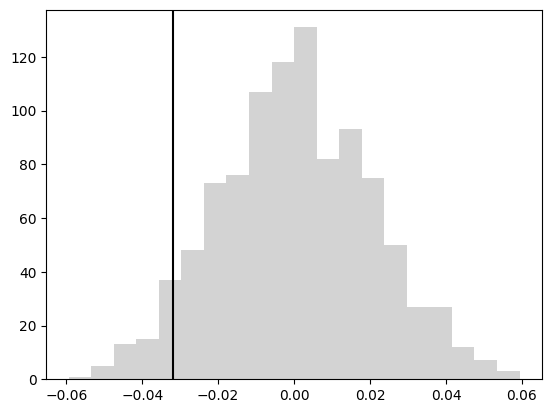

In [7]:
fig, ax = plt.subplots()
ax.hist(res.null_distribution, bins=20, color='lightgrey')
ax.axvline(statistic(ISC['t2'], ISC['t3']), color='black')
plt.show()

# Exercise 8

In [8]:
df = pd.DataFrame([
  ['B1', 'A', 89], ['B1', 'B', 88], ['B1', 'C', 97], ['B1', 'D', 94],
  ['B2', 'A', 84], ['B2', 'B', 77], ['B2', 'C', 92], ['B2', 'D', 79],
  ['B3', 'A', 81], ['B3', 'B', 87], ['B3', 'C', 87], ['B3', 'D', 85],
  ['B4', 'A', 87], ['B4', 'B', 92], ['B4', 'C', 89], ['B4', 'D', 84],
  ['B5', 'A', 79], ['B5', 'B', 81], ['B5', 'C', 80], ['B5', 'D', 88],
], columns=['blend', 'treatment', 'result'])

In [9]:
model = smf.ols('result ~ C(blend) + C(treatment)', data=df).fit()
anova.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(blend),4.0,264.0,66.000000,3.504425,0.040746
C(treatment),3.0,70.0,23.333333,1.238938,0.338658
Residual,12.0,226.0,18.833333,NaN,NaN


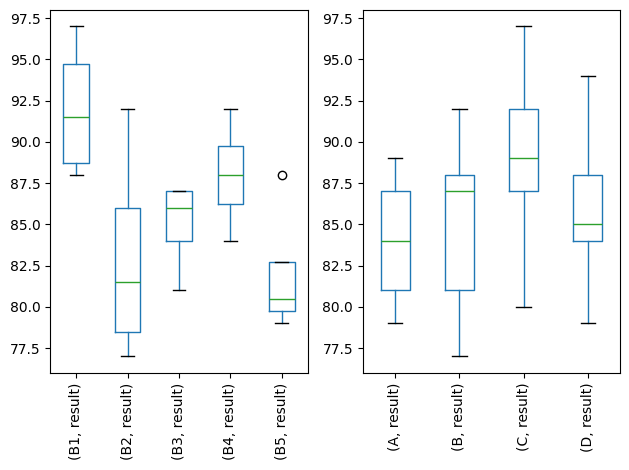

In [10]:
fig, axes = plt.subplots(ncols=2)
df.groupby('blend').boxplot(column='result', subplots=False, 
                            rot=90, grid=False, ax=axes[0])
df.groupby('treatment').boxplot(column='result', subplots=False, 
                            rot=90, grid=False, ax=axes[1])
plt.tight_layout()
plt.show()

# Exercise 9

In [11]:
df = pd.DataFrame([
    [1, 'A', 38], [1, 'B', 30],   [2, 'C', 50], [2, 'D', 27], 
    [3, 'E', 33], [3, 'F', 28],   [4, 'G', 62], [4, 'H', 30], 
    [5, 'A', 37], [5, 'C', 25],   [6, 'B', 38], [6, 'H', 52], 
    [7, 'D', 89], [7, 'E', 89],   [8, 'F', 27], [8, 'G', 75], 
    [9, 'A', 17], [9, 'D', 25],   [10, 'B', 47], [10, 'G', 63],
    [11, 'C', 32], [11, 'F', 39], [12, 'E', 20], [12, 'H', 18],
    [13, 'A', 5], [13, 'E', 15],  [14, 'B', 45], [14, 'C', 38],
    [15, 'D', 11], [15, 'G', 24], [16, 'F', 37], [16, 'H', 39],
    [17, 'A', 23], [17, 'F', 40], [18, 'B', 20], [18, 'D', 14],
    [19, 'C', 18], [19, 'H', 10], [20, 'E', 22], [20, 'G', 52],
    [21, 'A', 66], [21, 'G', 67], [22, 'B', 23], [22, 'F', 46],
    [23, 'C', 22], [23, 'E', 28], [24, 'D', 20], [24, 'H', 40],
    [25, 'A', 27], [25, 'H', 32], [26, 'B', 10], [26, 'E', 40],
    [27, 'C', 32], [27, 'G', 33], [28, 'D', 18], [28, 'F', 23],
], columns=['block', 'treatment', 'result'])

In [12]:
model = smf.ols('result ~ C(block) + C(treatment)', data=df).fit()
anova.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(block),27.0,15030.482143,556.684524,5.334113,0.000109
C(treatment),7.0,1901.875000,271.696429,2.603376,0.042207
Residual,21.0,2191.625000,104.363095,NaN,NaN


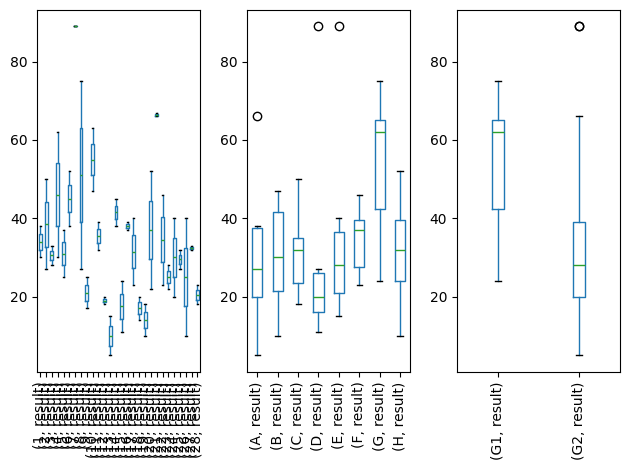

In [13]:
df['group'] = ['G1' if t == 'G' else 'G2' for t in df['treatment']]
fig, axes = plt.subplots(ncols=3)
df.groupby('block').boxplot(column='result', subplots=False, 
                            rot=90, grid=False, ax=axes[0])
df.groupby('treatment').boxplot(column='result', subplots=False, 
                            rot=90, grid=False, ax=axes[1])
df.groupby('group').boxplot(column='result', subplots=False, 
                            rot=90, grid=False, ax=axes[2])
plt.tight_layout()
plt.show()

# Exercise 10

In [14]:
df = pd.DataFrame([
    [1,1,'A',312], [1,2,'B',299], [1,3,'C',315], [1,4,'D',290],
    [2,1,'C',295], [2,2,'A',317], [2,3,'D',313], [2,4,'B',300],
    [3,1,'B',295], [3,2,'D',298], [3,3,'A',312], [3,4,'C',315],
    [4,1,'D',313], [4,2,'C',314], [4,3,'B',299], [4,4,'A',300],
], columns=['day', 'batch', 'mixture', 'result'])

In [15]:
model = smf.ols('result ~ C(day) + C(batch) + C(mixture)', data=df).fit()
anova.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(day),3.0,16.1875,5.395833,0.048079,0.984704
C(batch),3.0,165.6875,55.229167,0.492111,0.700652
C(mixture),3.0,388.6875,129.562500,1.154446,0.401167
Residual,6.0,673.3750,112.229167,NaN,NaN


# Exercise 11

In [16]:
from mistat.design import doe
np.random.seed(2)

# Build design from factors
FacDesign = doe.full_fact({
    'k': [1500, 3000, 4500],
    's': [0.005, 0.0125, 0.02],
})

# Randomize design
FacDesign = FacDesign.sample(frac=1).reset_index(drop=True)

# Setup and run simulator with five replicates 
# for each combination of factors
simulator = mistat.PistonSimulator(n_replicate=5, **FacDesign,
                                   m=30, v0=0.005, p0=90_000, t=290, t0=340)
result = simulator.simulate()

model = smf.ols('seconds ~ C(k) * C(s)', data=result).fit()
print(anova.anova_lm(model).round(4))

             df  sum_sq  mean_sq        F  PR(>F)
C(k)        2.0  0.0039   0.0019   2.0508  0.1434
C(s)        2.0  0.1030   0.0515  54.8672  0.0000
C(k):C(s)   4.0  0.0058   0.0015   1.5531  0.2078
Residual   36.0  0.0338   0.0009      NaN     NaN


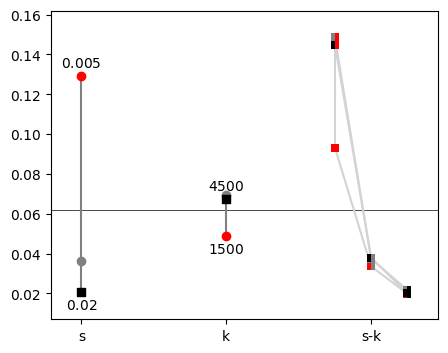

In [17]:
_, ax = plt.subplots(figsize=[5, 4])
mistat.marginalInteractionPlot(result[['s', 'k', 'seconds']], 'seconds', ax=ax)
plt.show()

# Exercise 12

In [18]:
# group and aggregate seconds by group
grouped = result.groupby(['s', 'k']).agg({'seconds': ['mean', 'std']})
# convert the multi-level index back to columns
grouped = grouped.reset_index()
# rename the columns to remove the multi-level index for the column names
grouped.columns = ['s', 'k', 'mean', 'std']
print(grouped)

        s     k      mean       std
0  0.0050  1500  0.093227  0.026990
1  0.0050  3000  0.148749  0.066597
2  0.0050  4500  0.144906  0.056237
3  0.0125  1500  0.033497  0.003607
4  0.0125  3000  0.037292  0.007923
5  0.0125  4500  0.037975  0.005075
6  0.0200  1500  0.019859  0.001296
7  0.0200  3000  0.021716  0.002626
8  0.0200  4500  0.019957  0.003601


In [19]:
model = smf.ols(f"mean ~ s + k + s:k", data=grouped).fit()
model.params

Intercept    0.090547
s           -3.791223
k            0.000021
s:k         -0.001146
dtype: float64

In [20]:
model = smf.ols(f"std ~ s + k + s:k", data=grouped).fit()
model.params

Intercept    0.025397
s           -1.366082
k            0.000011
s:k         -0.000599
dtype: float64

# Exercise 13

In [21]:
treatments = []
for combo in itertools.product([0, 1], [0,1], [0,1], [0,1]):
    nu = sum(ij * 2**(j-1) for j, ij in enumerate(combo, 1))
    treatments.append({
        'nu': int(nu),
        'A': combo[0], 'B': combo[1],
        'C': combo[2], 'D': combo[3],
    })
# sort to standard order
df = pd.DataFrame(treatments).sort_values('nu', ignore_index=True)
df = df.set_index('nu')
# change the factors to (-1, 1)
for factor in ('A', 'B', 'C', 'D'):
    df.loc[df[factor] == 0, factor] = -1

In [22]:
df['response'] = [72, 60, 90, 80, 65, 60, 85, 80, 60, 50, 
                 88, 82, 58, 50, 84, 75]

In [23]:
model = smf.ols("response ~ A + B + C + D", data=df).fit()
model.params

Intercept    71.1875
A            -4.0625
B            11.8125
C            -1.5625
D            -2.8125
dtype: float64

In [24]:
sigma2 = np.sum(model.resid**2) / 11

In [25]:
df = 11
alpha_left = 1 - (1-0.99) / 2
alpha_right = (1-0.99) / 2
df * sigma2 / stats.chi2.ppf(alpha_left, df), df * sigma2 / stats.chi2.ppf(alpha_right, df)

(3.819115633496761, 39.25424120484008)

# Exercise 14

In [26]:
df = pd.DataFrame(
    [['A1', 'B1', v] for v in [18.3, 17.9, 18.5]] +
    [['A2', 'B1', v] for v in [17.9, 17.6, 16.2]] +
    [['A3', 'B1', v] for v in [19.1, 19.0, 18.9]] +
    [['A1', 'B2', v] for v in [20.5, 21.1, 20.7]] +
    [['A2', 'B2', v] for v in [18.2, 19.5, 18.9]] +
    [['A3', 'B2', v] for v in [22.1, 23.5, 22.9]] +
    [['A1', 'B3', v] for v in [21.5, 21.7, 21.9]] +
    [['A2', 'B3', v] for v in [20.1, 19.5, 18.9]] +
    [['A3', 'B3', v] for v in [22.3, 23.5, 23.3]],
    columns=['a', 'b', 'result']
)

In [27]:
model = smf.ols('result ~ C(a) + C(b) + C(a):C(b)', data=df).fit()
anova.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(a),2.0,43.080741,21.540370,70.495758,3.055533e-09
C(b),2.0,54.169630,27.084815,88.641212,4.802685e-10
C(a):C(b),4.0,4.345926,1.086481,3.555758,2.633500e-02
Residual,18.0,5.500000,0.305556,NaN,NaN


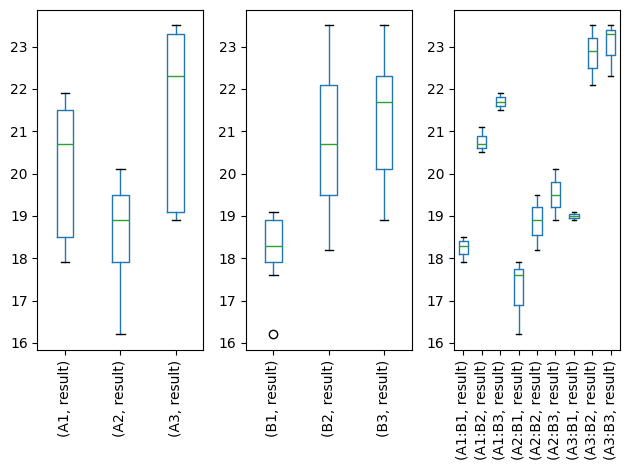

In [28]:
df['a:b'] = [f'{a}:{b}' for a, b in zip(df['a'], df['b'])]
fig, axes = plt.subplots(ncols=3)
df.groupby('a').boxplot(column='result', subplots=False, 
                            rot=90, grid=False, ax=axes[0])
df.groupby('b').boxplot(column='result', subplots=False, 
                            rot=90, grid=False, ax=axes[1])
df.groupby('a:b').boxplot(column='result', subplots=False, 
                            rot=90, grid=False, ax=axes[2])
plt.tight_layout()
plt.show()

# Exercise 15

In [29]:
generators = ['ABCDG', 'ABEFH']
print(mistat.subgroupOfDefining(generators))

['', 'ABCDG', 'ABEFH', 'CDEFGH']


In [30]:
from mistat.design.doeUtilities import aliasesInSubgroup
for main_effect in ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'):
    print(main_effect, 
          aliasesInSubgroup(main_effect, generators))

A ['ACDEFGH', 'BCDG', 'BEFH']
B ['ACDG', 'AEFH', 'BCDEFGH']
C ['ABCEFH', 'ABDG', 'DEFGH']
D ['ABCG', 'ABDEFH', 'CEFGH']
E ['ABCDEG', 'ABFH', 'CDFGH']
F ['ABCDFG', 'ABEH', 'CDEGH']
G ['ABCD', 'ABEFGH', 'CDEFH']
H ['ABCDGH', 'ABEF', 'CDEFG']


In [31]:
for interaction in ('B', 'C', 'D', 'E', 'F', 'G', 'H'):
    print(f'A{interaction}',
          aliasesInSubgroup(f'A{interaction}', generators))

AB ['ABCDEFGH', 'CDG', 'EFH']
AC ['ADEFGH', 'BCEFH', 'BDG']
AD ['ACEFGH', 'BCG', 'BDEFH']
AE ['ACDFGH', 'BCDEG', 'BFH']
AF ['ACDEGH', 'BCDFG', 'BEH']
AG ['ACDEFH', 'BCD', 'BEFGH']
AH ['ACDEFG', 'BCDGH', 'BEF']


In [32]:
generator = 'A B C D E F G H ABCDG ABEFH'
design = pd.DataFrame(fracfact(generator), columns=generator.split())
fracfact_design = design.query('ABCDG == 1 & ABEFH == 1')

# Exercise 16

In [33]:
print(mistat.subgroupOfDefining(['ACE', 'ABEF', 'ABCD']))

['', 'ABCD', 'ABEF', 'ACE', 'ADF', 'BCF', 'BDE', 'CDEF']


# Exercise 17

In [34]:
df = pd.DataFrame([
    [-1, -1, 55.8], [-1, -1, 54.4], [1, -1, 60.3], [1, -1, 60.9],
    [-1, 1, 63.9], [-1, 1, 64.4], [1, 1, 67.9], [1, 1, 68.5],
    [0, 0, 61.5], [0, 0, 62.0], [0, 0, 61.9], [0, 0, 62.4]
], columns=['X1', 'X2', 'Y'])

In [35]:
# ignore UserWarning
import warnings
warnings.simplefilter('ignore', category=UserWarning)

In [36]:
formula = ('Y ~ X1 + X2 + X1:X2')
model = smf.ols(formula, data=df).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.986   
Dependent Variable: Y                AIC:                19.8454 
Date:               2024-06-03 14:14 BIC:                21.7851 
No. Observations:   12               Log-Likelihood:     -5.9227 
Df Model:           3                F-statistic:        262.0   
Df Residuals:       8                Prob (F-statistic): 2.52e-08
R-squared:          0.990            Scale:              0.23568 
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    61.9917    0.1401  442.3492  0.0000  61.6685  62.3148
X1            2.3875    0.1716   13.9101  0.0000   1.9917   2.7833
X2            4.1625    0.1716   24.2516  0.0000   3.7667   4.5583
X1:X2        -0.3625    0.1716   -2.1120  0.0677  -0.7583   0.0333
--------------------

In [37]:
warnings.simplefilter('default', category=UserWarning)

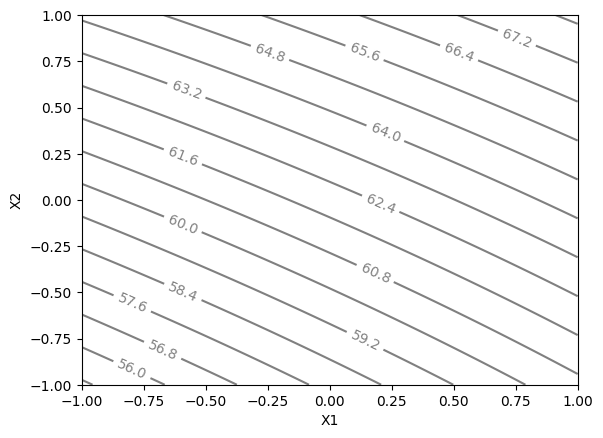

In [38]:
def plotResponseSurface(model, ncontours=20):
    x1 = np.linspace(-1, 1)
    x2 = np.linspace(-1, 1)
    X1, X2 = np.meshgrid(x1, x2)
    exog = pd.DataFrame({'X1': X1.ravel(), 'X2': X2.ravel()})
    responses = model.predict(exog=exog)
    CS = plt.contour(x1, x2,
                responses.values.reshape(len(x2), len(x1)),
                ncontours, colors='gray')
    ax = plt.gca()
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    return ax

plotResponseSurface(model)
plt.show()

In [39]:
# derive variance around the regression using an ANOVA (mean_sq of residuals)
res = anova.anova_lm(model)
res

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,45.601250,45.601250,193.490387,6.905851e-07
X2,1.0,138.611250,138.611250,588.140552,8.915958e-09
X1:X2,1.0,1.051250,1.051250,4.460552,6.766219e-02
Residual,8.0,1.885417,0.235677,NaN,NaN


In [40]:
# Estimate of variance?
# ['Residual', 'mean_sq'] gives variance around regression 
sigma2 =  df[df['X1'] == 0]['Y'].var()
var_residuals = res.loc['Residual', 'mean_sq']

F = var_residuals / sigma2
p = 1 - stats.f(8, 3).cdf(F)
print(f'F-ratio: {F:.4f}; p-value: {p:.2f}')

F-ratio: 1.7245; p-value: 0.36


# Exercise 18

In [41]:
# ignore UserWarning
import warnings
warnings.simplefilter('ignore', category=UserWarning)

In [42]:
df = pd.DataFrame([
    [1, 0, 95.6], [0.5, 0.866, 77.9], [-0.5, 0.866, 76.2],
    [-1, 0, 54.5], [-0.5, -0.866, 63.9], [0.5, -0.866, 79.1],
    [0, 0, 96.8], [0, 0, 94.8], [0, 0, 94.4], 
], columns=['X1', 'X2', 'Y'])

formula = ('Y ~ X1 + X2 + X1*X2 + I(X1**2) + I(X2**2)')
model = smf.ols(formula, data=df).fit()
print(model.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.855  
Dependent Variable: Y                AIC:                59.2942
Date:               2024-06-03 14:14 BIC:                60.4776
No. Observations:   9                Log-Likelihood:     -23.647
Df Model:           5                F-statistic:        10.47  
Df Residuals:       3                Prob (F-statistic): 0.0408 
R-squared:          0.946            Scale:              33.638 
----------------------------------------------------------------
               Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
----------------------------------------------------------------
Intercept      95.3333   3.3485 28.4703 0.0001  84.6768 105.9898
X1             16.5167   3.3485  4.9325 0.0160   5.8602  27.1732
X2              3.2044   3.3486  0.9569 0.4092  -7.4524  13.8612
X1:X2          -7.7945   6.6972 -1.1638 0.3286 -29.1081  13.5191
I(X1 ** 2)    -20.2833   5.2945 -3.8310 0.

In [43]:
warnings.simplefilter('default', category=UserWarning)

In [44]:
rsm = mistat.ResponseSurfaceMethod(model, ['X1', 'X2'])
stationary = rsm.stationary_point()
stationary

X1    0.407004
X2    0.000751
dtype: float64

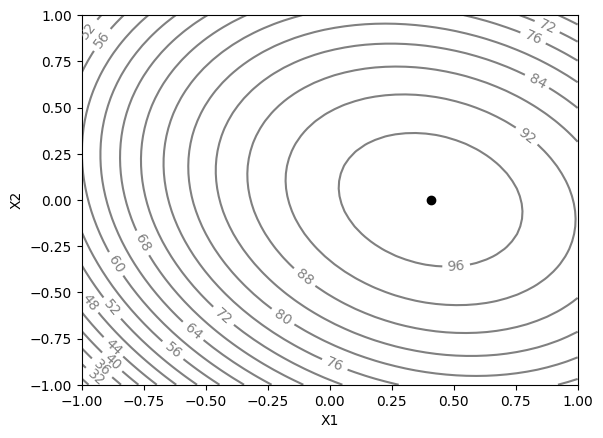

In [45]:
ax = plotResponseSurface(model)
ax.scatter(*stationary, color='black')
plt.show()

In [46]:
anova.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,818.400833,818.400833,24.329813,0.015976
X2,1.0,30.802500,30.802500,0.915712,0.409198
X1:X2,1.0,45.562500,45.562500,1.354504,0.328640
I(X1 ** 2),1.0,320.800500,320.800500,9.536911,0.053790
I(X2 ** 2),1.0,545.280333,545.280333,16.210355,0.027533
Residual,3.0,100.913333,33.637778,NaN,NaN
